In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/secondary_data.csv", sep=";")

In [ ]:
datos.count()


class                   61069
cap-diameter            61069
cap-shape               61069
cap-surface             46949
cap-color               61069
does-bruise-or-bleed    61069
gill-attachment         51185
gill-spacing            36006
gill-color              61069
stem-height             61069
stem-width              61069
stem-root                9531
stem-surface            22945
stem-color              61069
veil-type                3177
veil-color               7413
has-ring                61069
ring-type               58598
spore-print-color        6354
habitat                 61069
season                  61069
dtype: int64

# Bar Plots

[Text(0.5, 0, 'Cap Surface')]

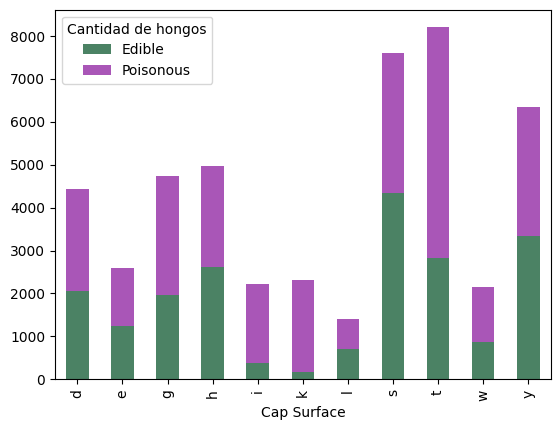

In [ ]:
cap2 = datos.groupby(["cap-surface", "class"]).size().reset_index(name="cantidad")
cap2 = cap2.pivot_table(values='cantidad', index = ['cap-surface', 'class'], aggfunc= "sum")
cap2 = cap2.unstack()
cap2 =cap2.reset_index()

palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)

plot = cap2.set_index('cap-surface').plot(kind='bar', stacked=True,  cmap= palette)
plot.legend( loc='upper left', labels=['Edible', 'Poisonous']).set(title='Cantidad de hongos')
plot.set(xlabel='Cap Surface')

[Text(0.5, 0, 'Cap Color')]

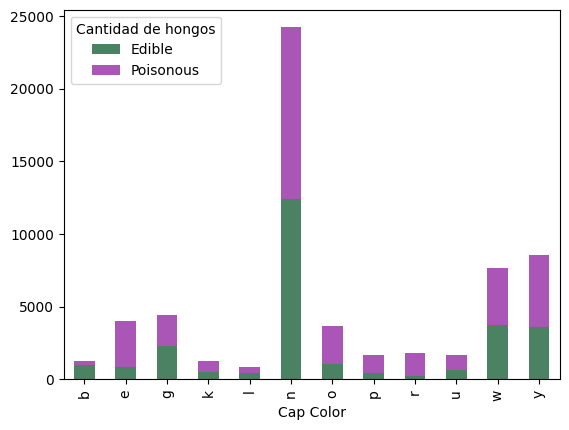

In [ ]:
cap = datos.groupby(["cap-color", "class"]).size().reset_index(name="cantidad")
cap = cap.pivot_table(values='cantidad', index = ['cap-color', 'class'], aggfunc= "sum")
cap = cap.unstack()
cap =cap.reset_index()
cap = cap.fillna(0)

palette = sns.diverging_palette(145, 300, s=60, as_cmap=True)

plot = cap.set_index('cap-color').plot(kind='bar', stacked=True,  cmap= palette)
plot.legend(title='Cantidad', loc='upper left', labels=['Edible', 'Poisonous']).set(title='Cantidad de hongos')
plot.set(xlabel='Cap Color')

# Heat Maps

<ipython-input-8-5d46688a6a20>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grafico = forma.pivot("cap-shape", "stem-root", "cantidad")


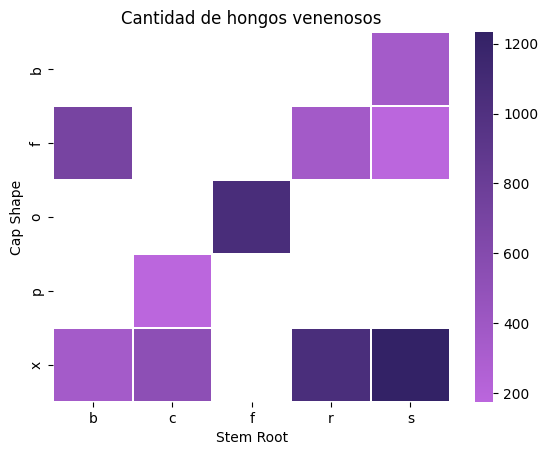

In [ ]:
forma = datos.groupby(["cap-shape", "stem-root","class"]).size().reset_index(name="cantidad")
forma = forma.query("`class` == 'p' ")
grafico = forma.pivot("cap-shape", "stem-root", "cantidad")

paleta= paleta1=sns.color_palette("blend:#B6D,#326", as_cmap=True)
plot = sns.heatmap(grafico,linewidth=.3, cmap=paleta).set(title='Cantidad de hongos venenosos', xlabel='Stem Root', ylabel = 'Cap Shape')

<ipython-input-11-3ae2dd186ac3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grafico = forma.pivot("cap-shape", "stem-root", "cantidad")


[Text(0.5, 1.0, 'Cantidad de hongos comestibles'),
 Text(0.5, 23.52222222222222, 'Stem Root'),
 Text(50.722222222222214, 0.5, 'Cap Shape')]

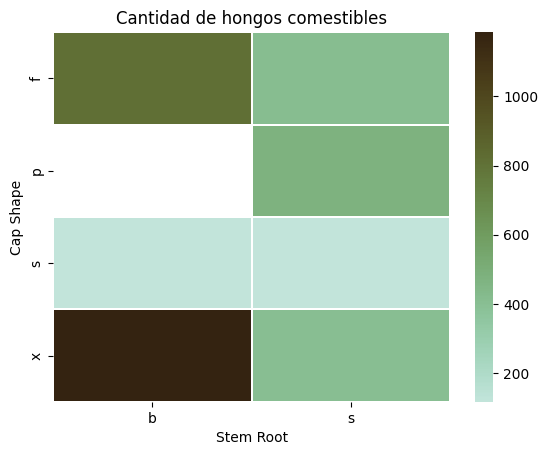

In [ ]:
forma = datos.groupby(["cap-shape", "stem-root","class"]).size().reset_index(name="cantidad")
forma = forma.query("`class` == 'e' ")
grafico = forma.pivot("cap-shape", "stem-root", "cantidad")

paleta2 = sns.color_palette("ch:s=1,r=.5", as_cmap=True)
sns.heatmap(grafico,linewidth=.3, cmap=paleta2).set(title='Cantidad de hongos comestibles', xlabel='Stem Root', ylabel = 'Cap Shape')

<ipython-input-12-ddfb6d85f82e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grafico = forma.pivot("season", "habitat", "cantidad")


[Text(0.5, 1.0, 'Cantidad de hongos venenosos'),
 Text(0.5, 23.52222222222222, 'Habitat'),
 Text(50.722222222222214, 0.5, 'Season')]

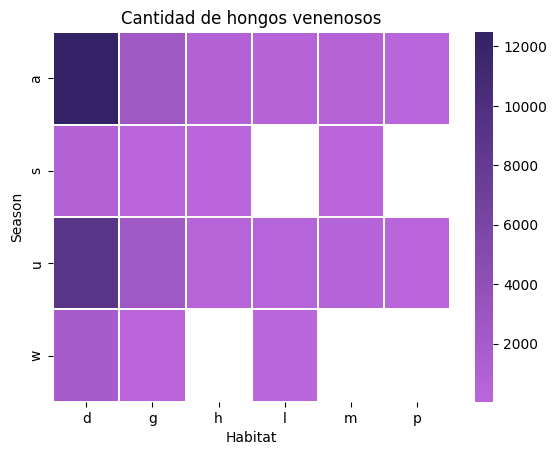

In [ ]:
forma = datos.groupby(["season", "habitat","class"]).size().reset_index(name="cantidad")
forma = forma.query("`class` == 'p' ")
grafico = forma.pivot("season", "habitat", "cantidad")

paleta1=sns.color_palette("blend:#B6D,#326", as_cmap=True)
sns.heatmap(grafico,linewidth=.3, cmap= paleta1).set(title='Cantidad de hongos venenosos', xlabel='Habitat', ylabel = 'Season')

<ipython-input-13-1cda533340b3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grafico = forma.pivot("season", "habitat", "cantidad")


[Text(0.5, 1.0, 'Cantidad de hongos comestibles'),
 Text(0.5, 23.52222222222222, 'Habitat'),
 Text(50.722222222222214, 0.5, 'Season')]

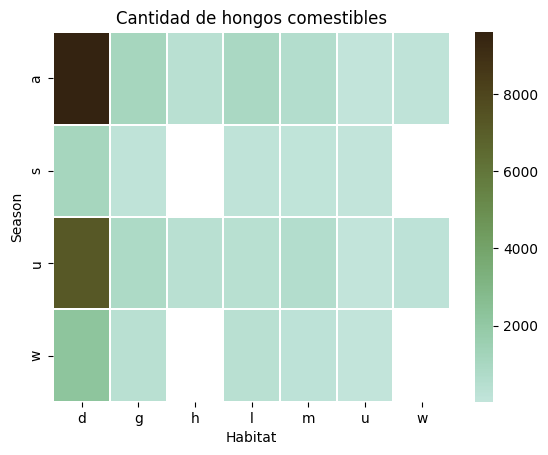

In [ ]:
forma = datos.groupby(["season", "habitat","class"]).size().reset_index(name="cantidad")
forma = forma.query("`class` == 'e' ")
grafico = forma.pivot("season", "habitat", "cantidad")

paleta2 = sns.color_palette("ch:s=1,r=.5", as_cmap=True)
sns.heatmap(grafico,linewidth=.3, cmap= paleta2).set(title='Cantidad de hongos comestibles', xlabel='Habitat', ylabel = 'Season')

Me sirve mas para concluir en que habitat/season hay mas hongos no tanto si los venenosos/edible proliferan en alguna condicion. Estas dos graficas terminan no siendo muy representativas para lo que quiero investigar

# Violin Plot

[Text(0.5, 1.0, 'Altura de tallo de hongos comestibles y venenosos'),
 Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Stem Height')]

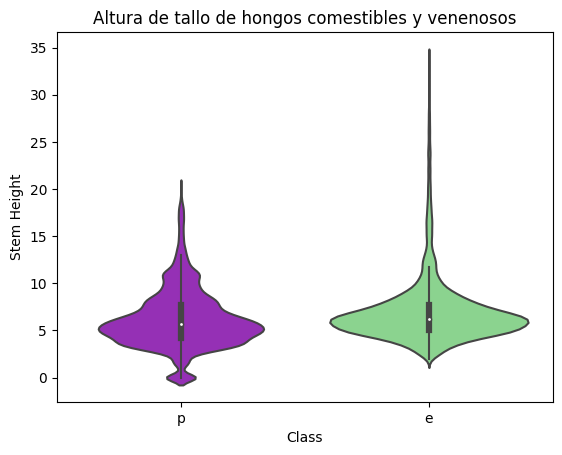

In [ ]:
violin = datos
palette = ['#A01ACB', '#7FDF84']
sns.violinplot(violin, x="class",y="stem-height", palette = palette).set(title='Altura de tallo de hongos comestibles y venenosos', xlabel='Class', ylabel = 'Stem Height')

[Text(0.5, 1.0, 'Ancho del tallo de hongos comestibles y venenosos'),
 Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Stem Width')]

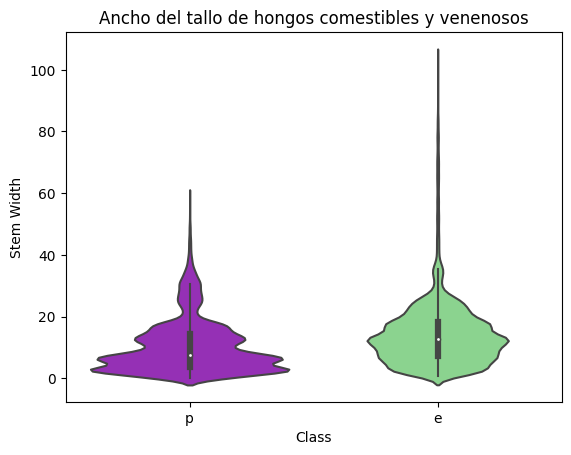

In [ ]:
violin = datos
palette = ['#A01ACB', '#7FDF84']
sns.violinplot(violin, x="class",y="stem-width", palette = palette).set(title='Ancho del tallo de hongos comestibles y venenosos', xlabel='Class', ylabel = 'Stem Width')

# Box Plot

[Text(0.5, 1.0, 'Diametro de sombrero de hongos comestibles y venenosos'),
 Text(0.5, 0, 'Class'),
 Text(0, 0.5, 'Cap Diameter')]

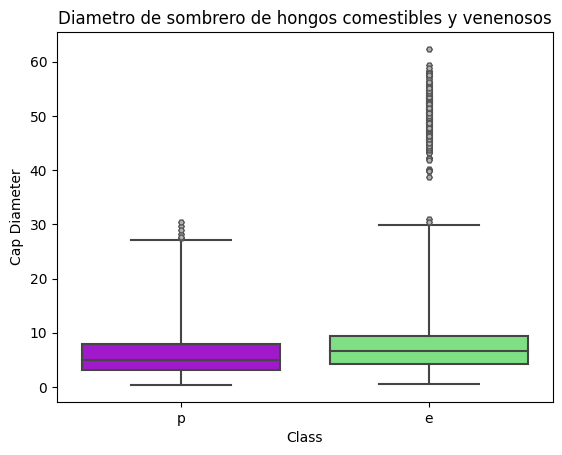

In [ ]:
box = datos
palette = ['#A01ACB', '#7FDF84']
flierprops = dict(markerfacecolor=sns.color_palette("Set2")[7],  markeredgecolor= '#545454' ,marker='H')

plot = sns.boxplot(box, x="class",y="cap-diameter", palette = palette, fliersize = 4, whis = 4, saturation= 10,  flierprops=flierprops)
plot.set(title='Diametro de sombrero de hongos comestibles y venenosos', xlabel='Class', ylabel = 'Cap Diameter')

No alargue los bigotes porque me parece importante mostrar el gap de diametros en el caso de los comestibles.